In [61]:
import random 
import pandas as pd 
import seaborn as sns

In [62]:
#This function generates a string that represents DNA, and it is 400 characters long
#Either chooses A,C,T,G randomly till it reaches 400 characters
def generateDNA():
    DNA = []
    #For 400 times
    for i in range(400):
        #Randomly choose a number 1-4
        num = random.randint(1,4)
        match num:
            #number is 1, append A
            case 1:
                DNA.append("A")
            #number is 2, append C
            case 2:
                DNA.append("C")
            #number is 3, append T
            case 3:
                DNA.append("T")
            #number is 4, append G
            case 4:
                DNA.append("G")
    #return the randomly generated DNA strand 
    return DNA

In [63]:
#Finds the least number of insertions, deletions, and/or removals needed to make word1 == word2 
def EditDistance(w1, w2):
    #length of word1
    l1 = len(w1)
    #length of word2
    l2 = len(w2)
    #Making a matrix that is the width of the width of word2 + 1, by the length of word1 + 1
    matrix = [[0] * (l1+1) for i in range(l2+1)]
    
    '''
    w1 is associated with the j index (inner)
    w2 is associated with the i index (outer)
    '''
    
    for i in range(l2+1):
        for j in range(l1+1):

            #base case
            if(i == 0):
                matrix[i][j] = j
            elif(j == 0):
                matrix[i][j] = i
            
            #if the letter in both words is the same
            elif(w1[j-1] == w2[i-1]):
                matrix[i][j] = matrix[i-1][j-1]
            
            #if the word needs to be replaced, inserted, or removed 
            #find the minimum of the three surrounding values and add 1 
            else:
                replace = matrix[i-1][j-1]
                insert = matrix[i][j-1]
                remove = matrix[i-1][j]
                matrix[i][j] = 1 + min(remove,insert,replace)
    #Return the bottom right corner of the matrix 
    return matrix[l2][l1]

In [64]:
#Calculates the edit distance pair for each DNA string in the list given a list of DNAs 
def calcEditDistance(DNA_list):
    #Creating empty list that'll hold the edit distance #s 
    EditDistance_list = []
    
    #For each DNA in the DNA list
    for i in DNA_list:
        #Find the edit distance between that DNA and every other DNA in the list
        for j in DNA_list:
            #Append it to edit distance list 
            EditDistance_list.append(EditDistance(i,j))
    #return the list 
    return EditDistance_list 

<Axes: xlabel='Edit_Distance', ylabel='Count'>

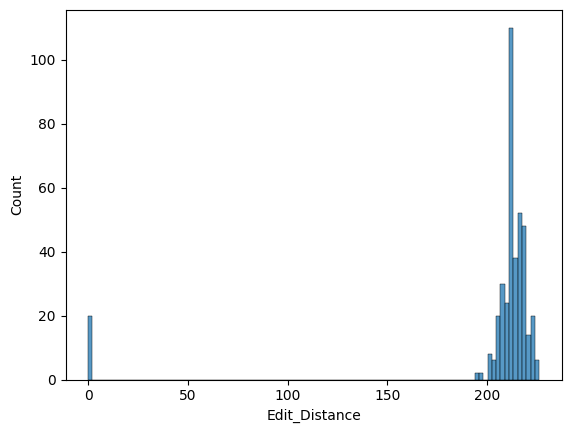

In [65]:
#Holds our randomly generated DNA list, empty currently 
fake_DNA_list = []

for i in range(20):
    #Make 20, 400 character DNA strands and add it to the list 
    fake_DNA_list.append(generateDNA())

#Calculate the edit distance between each DNA pair 
fake_Edit_Distance_btw_sets = calcEditDistance(fake_DNA_list)

#Make a dataframe of it and plot it on a histogram 
fED_df = pd.DataFrame({'Edit_Distance' : fake_Edit_Distance_btw_sets})
sns.histplot(data = fED_df, x = "Edit_Distance")

#The mean of the histogram of the edit distances seems to be consistently around the 225-240 range 
#The 0's are because of when we're calculating the edit distance between the same sequences 

<Axes: xlabel='Edit_Distance', ylabel='Count'>

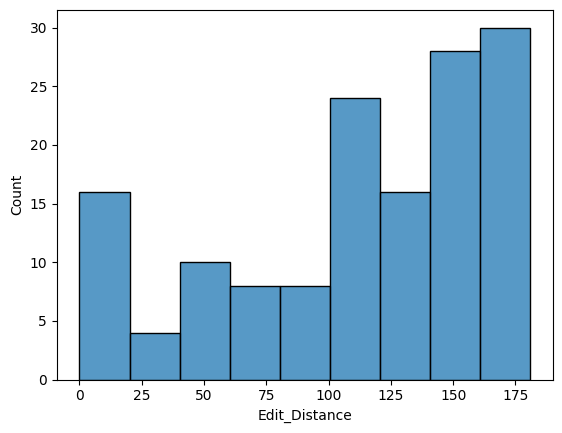

In [66]:
from Bio import Entrez, SeqIO

#Function fetches sequence given an accession number of a primate, for all of our primates, and adds their DNA strands to a list 
def fetch_sequences(accession_dict):
    #DNA list to hold our DNAs found by searching a given primate's accession number 
    DNA_list = []

    #For each key in our dictionary
    for key in accession_dict:
        #Read the key's value (accession number) and then access it's DNA sequence
        handle = Entrez.efetch(db="nucleotide", id=accession_dict[key], rettype="fasta")
        record = SeqIO.read(handle, "fasta")
        #Append the DNA sequence to our DNA_list
        DNA_list.append(record.seq)
        #Close the handle and move on to the next key 
        handle.close()
    #return the DNA list 
    return DNA_list

#Species data that we're given for the assignment 
species_data = {'German_Neanderthal' : 'AF011222',
                'Russian_Neanderthal' : 'AF254446',
                'European_Human' : 'X90314',
                'Mountain_Gorilla_Rwanda' : 'AF089820',
                'Chimp_Troglodytes' : 'AF176766',
                'Puti_Orangutan' : 'AF451972',
                'Jari_Orangutan' : 'AF451964',
                'Western_Lowland_Gorilla' : 'AY079510',
                'Eastern_Lowland_Gorilla' : 'AF050738',
                'Chimp Schweinfurthii' : 'AF176722',
                'Chimp_Vellerosus' : 'AF315498',
                'Chimp_Verus' : 'AF176731'}
    
    
# Fetch the DNA sequences from the accession numbers in our dictionary 
DNA_sequences = fetch_sequences(species_data)
#Find the edit distance for each DNA pair
Edit_Distance_btw_sets = calcEditDistance(DNA_sequences)

#Make a dataframe of it and plot it onto a histogram 
ED_df = pd.DataFrame({'Edit_Distance' : Edit_Distance_btw_sets})
sns.histplot(data = ED_df, x = "Edit_Distance")

#The average is probably around the 100-125 range